In [1]:
import scvi
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os


/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
"""
scArches skin

We recommend this method for assessing differential abundance (low resource).

For optimal cell annotations, we found the resource-high notebook generated better results.

"""

# Load model

In [2]:
# /nfs/team298/ls34/adult_skin/final_models$ ls
# acr_model_reference_scvi.pt  nichecompass_reference_model_params.pt  scrna_scanvi_model.pt

In [3]:
MODEL_PATH = '/nfs/team298/ls34/adult_skin/final_models/model_A_scvi_6349_QueryREYNOLDS'
MODEL_NAME = "scviSKIN"
MODEL_PATH


'/nfs/team298/ls34/adult_skin/final_models/model_A_scvi_6349_QueryREYNOLDS'

In [4]:
"""
where to save output
"""
data_dir = '/nfs/team298/ls34/new_disease_atlas/milopy_final/'
DATASET="TUTORIAL"

In [5]:
"""
LOAD YOUR DATA
"""
adata_tomap_path = '/lustre/scratch126/cellgen/haniffa/ls34/tmp/adata_skin_prepublication_r.h5ad'
target_adata=sc.read_h5ad(adata_tomap_path)


In [6]:
"""
SET SAMPLE ID COLUMN
"""
target_adata.obs["sample_id"]=target_adata.obs["orig.ident"]

In [7]:
vae_q = scvi.model.SCVI.load_query_data(
             target_adata,
             MODEL_PATH,
             inplace_subset_query_vars=True)

INFO     File /nfs/team298/ls34/adult_skin/final_models/model_A_scvi_6349_QueryREYNOLDS/model.pt already downloaded


/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [14]:
MAX_EPOCHS=10
neighbor=20
MIN_UMAP_DISTANCE=0.1

In [9]:
vae_q.train(max_epochs=MAX_EPOCHS, 
            plan_kwargs=dict(weight_decay=0.0))# use_gpu='cuda')


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-SXM4-80GB MIG 1c.7g.80gb') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [MIG-GPU-c92e82f0-acdb-bfba-5c7c-90306242f281/0/0]
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Epoch 1/10:   0%|          | 0/10 [00:00<?, ?it/s]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/10:  10%|█         | 1/10 [00:29<04:24, 29.41s/it, v_num=1, train_loss_step=2.21e+3, train_loss_epoch=1.96e+3]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/10:  20%|██        | 2/10 [01:04<04:21, 32.69s/it, v_num=1, train_loss_step=2.02e+3, train_loss_epoch=1.94e+3]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/10:  30%|███       | 3/10 [01:31<03:31, 30.22s/it, v_num=1, train_loss_step=1.82e+3, train_loss_epoch=1.94e+3]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/10:  40%|████      | 4/10 [02:04<03:06, 31.15s/it, v_num=1, train_loss_step=1.98e+3, train_loss_epoch=1.94e+3]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 6/10:  50%|█████     | 5/10 [02:36<02:36, 31.37s/it, v_num=1, train_loss_step=1.86e+3, train_loss_epoch=1.94e+3]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 7/10:  60%|██████    | 6/10 [03:06<02:04, 31.21s/it, v_num=1, train_loss_step=1.89e+3, train_loss_epoch=1.94e+3]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 8/10:  70%|███████   | 7/10 [03:37<01:33, 31.13s/it, v_num=1, train_loss_step=1.83e+3, train_loss_epoch=1.94e+3]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 9/10:  80%|████████  | 8/10 [04:10<01:03, 31.54s/it, v_num=1, train_loss_step=1.85e+3, train_loss_epoch=1.94e+3]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 10/10:  90%|█████████ | 9/10 [04:41<00:31, 31.37s/it, v_num=1, train_loss_step=2.01e+3, train_loss_epoch=1.94e+3]

/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/software/cellgen/team298/ls34/scpoli/lib/python3.11/site-packages/scvi/module/_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 10/10: 100%|██████████| 10/10 [05:12<00:00, 31.40s/it, v_num=1, train_loss_step=1.86e+3, train_loss_epoch=1.94e+3]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 10/10: 100%|██████████| 10/10 [05:12<00:00, 31.28s/it, v_num=1, train_loss_step=1.86e+3, train_loss_epoch=1.94e+3]


In [10]:
print("trained")
vae_q.save(data_dir + f'{MODEL_NAME}_{DATASET}',
                   save_anndata=True, overwrite=True)

trained


In [11]:
latent = vae_q.get_latent_representation() 
target_adata=sc.read_h5ad(adata_tomap_path)



In [12]:
target_adata.obsm["X_scarches"] = latent


In [15]:
neighbor_id = "neighbor_"+str(neighbor)   
sc.pp.neighbors(target_adata, use_rep = 'X_scarches', metric = "euclidean", n_neighbors=neighbor)
print("neighbours done")

sc.tl.umap(target_adata, min_dist=MIN_UMAP_DISTANCE) 
print(f"UMAP done. Min dist {MIN_UMAP_DISTANCE}")


neighbours done
UMAP done. Min dist 0.1


AnnData object with n_obs × n_vars = 274834 × 34621
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'orig.nb', 'batch', 'Tissue', 'calls', 'percent.mt', 'QC', 'RNA_snn_res.0.5', 'seurat_clusters', 'seurat_clusters_harmony', 'age', 'sex', 'race', 'bodysite', 'celltype'
    uns: 'neighbors', 'umap'
    obsm: 'X_scarches', 'X_umap'
    obsp: 'distances', 'connectivities'

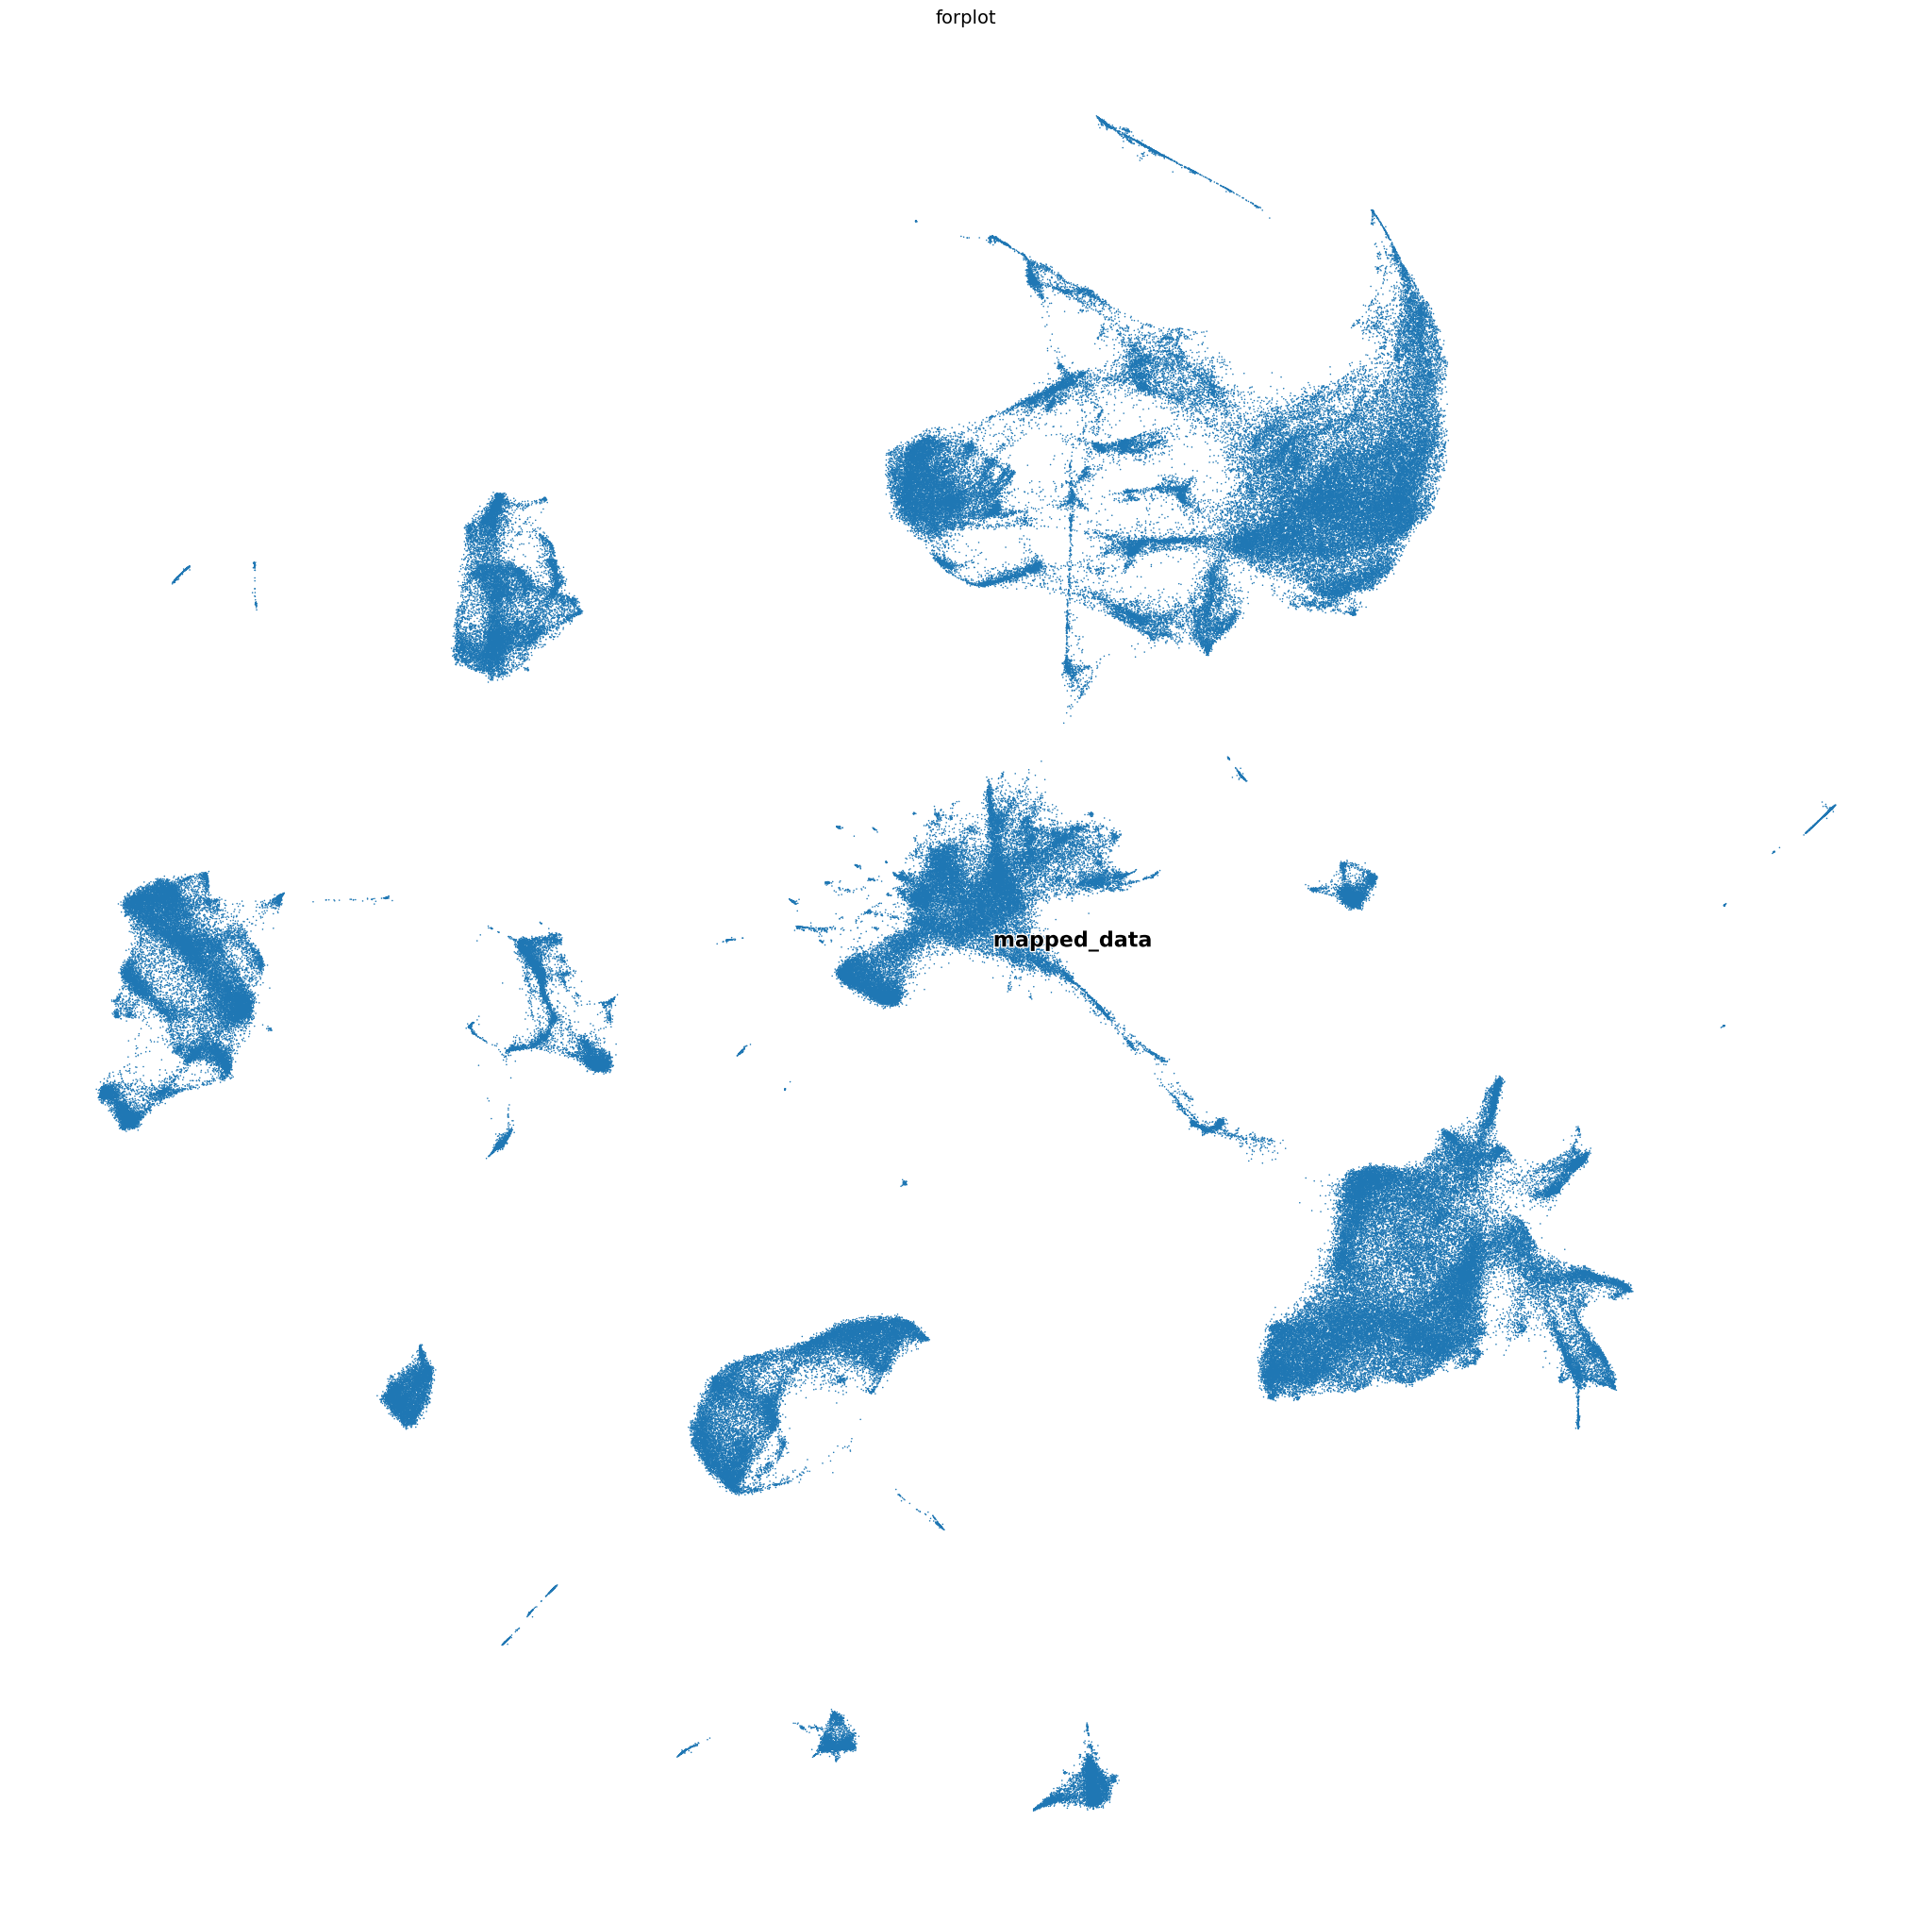

In [19]:
"""
Show how new data maps to atlas. Note that if no QC has been performed, a low QC cluster often forms (but in this dataset, QC had already been performed)
"""
target_adata.obs["forplot"]="mapped_data"
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(26,26))

sc.pl.umap(
    target_adata,
    color=[
        'forplot',  
    ],
    legend_loc="on data",
    s=5, 
    legend_fontoutline=2,
    legend_fontsize=16,
    title="Data post-scArches"
)

In [23]:
SAVE_PATH = data_dir + f'{MODEL_NAME}_{DATASET}/adata_processed_scarchesskin.h5ad'
target_adata.write(SAVE_PATH)
print("Saved to: ", SAVE_PATH )

Saved to:  /nfs/team298/ls34/new_disease_atlas/milopy_final/scviSKIN_TUTORIAL/adata_processed_scarchesskin.h5ad


# Let's see how the annotations look from the high-res tutorial

In [1]:
import scanpy as sc
target_adata=sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/milopy_final/scviSKIN_TUTORIAL/adata_processed_scarchesskin.h5ad')


In [2]:
import pickle

path = "/nfs/team298/ls34/dicts/tutorial_scanvi_predictions.pkl"

with open(path, "rb") as f:
    scanvi_predictions_dict = pickle.load(f)

target_adata.obs["resourcehi_predictions"]=target_adata.obs.index.map(scanvi_predictions_dict)
target_adata.obs["resourcehi_predictions"].value_counts()

resourcehi_predictions
KC3                 61958
F1: Superficial     23444
F2: Universal       18649
KC1                 18616
Pericyte1           11147
                    ...  
ILC_Prolif              4
Satellite cell          3
ILC3_CCL1+PTGDS+        3
Cartilage               2
Eosinophil              1
Name: count, Length: 102, dtype: int64

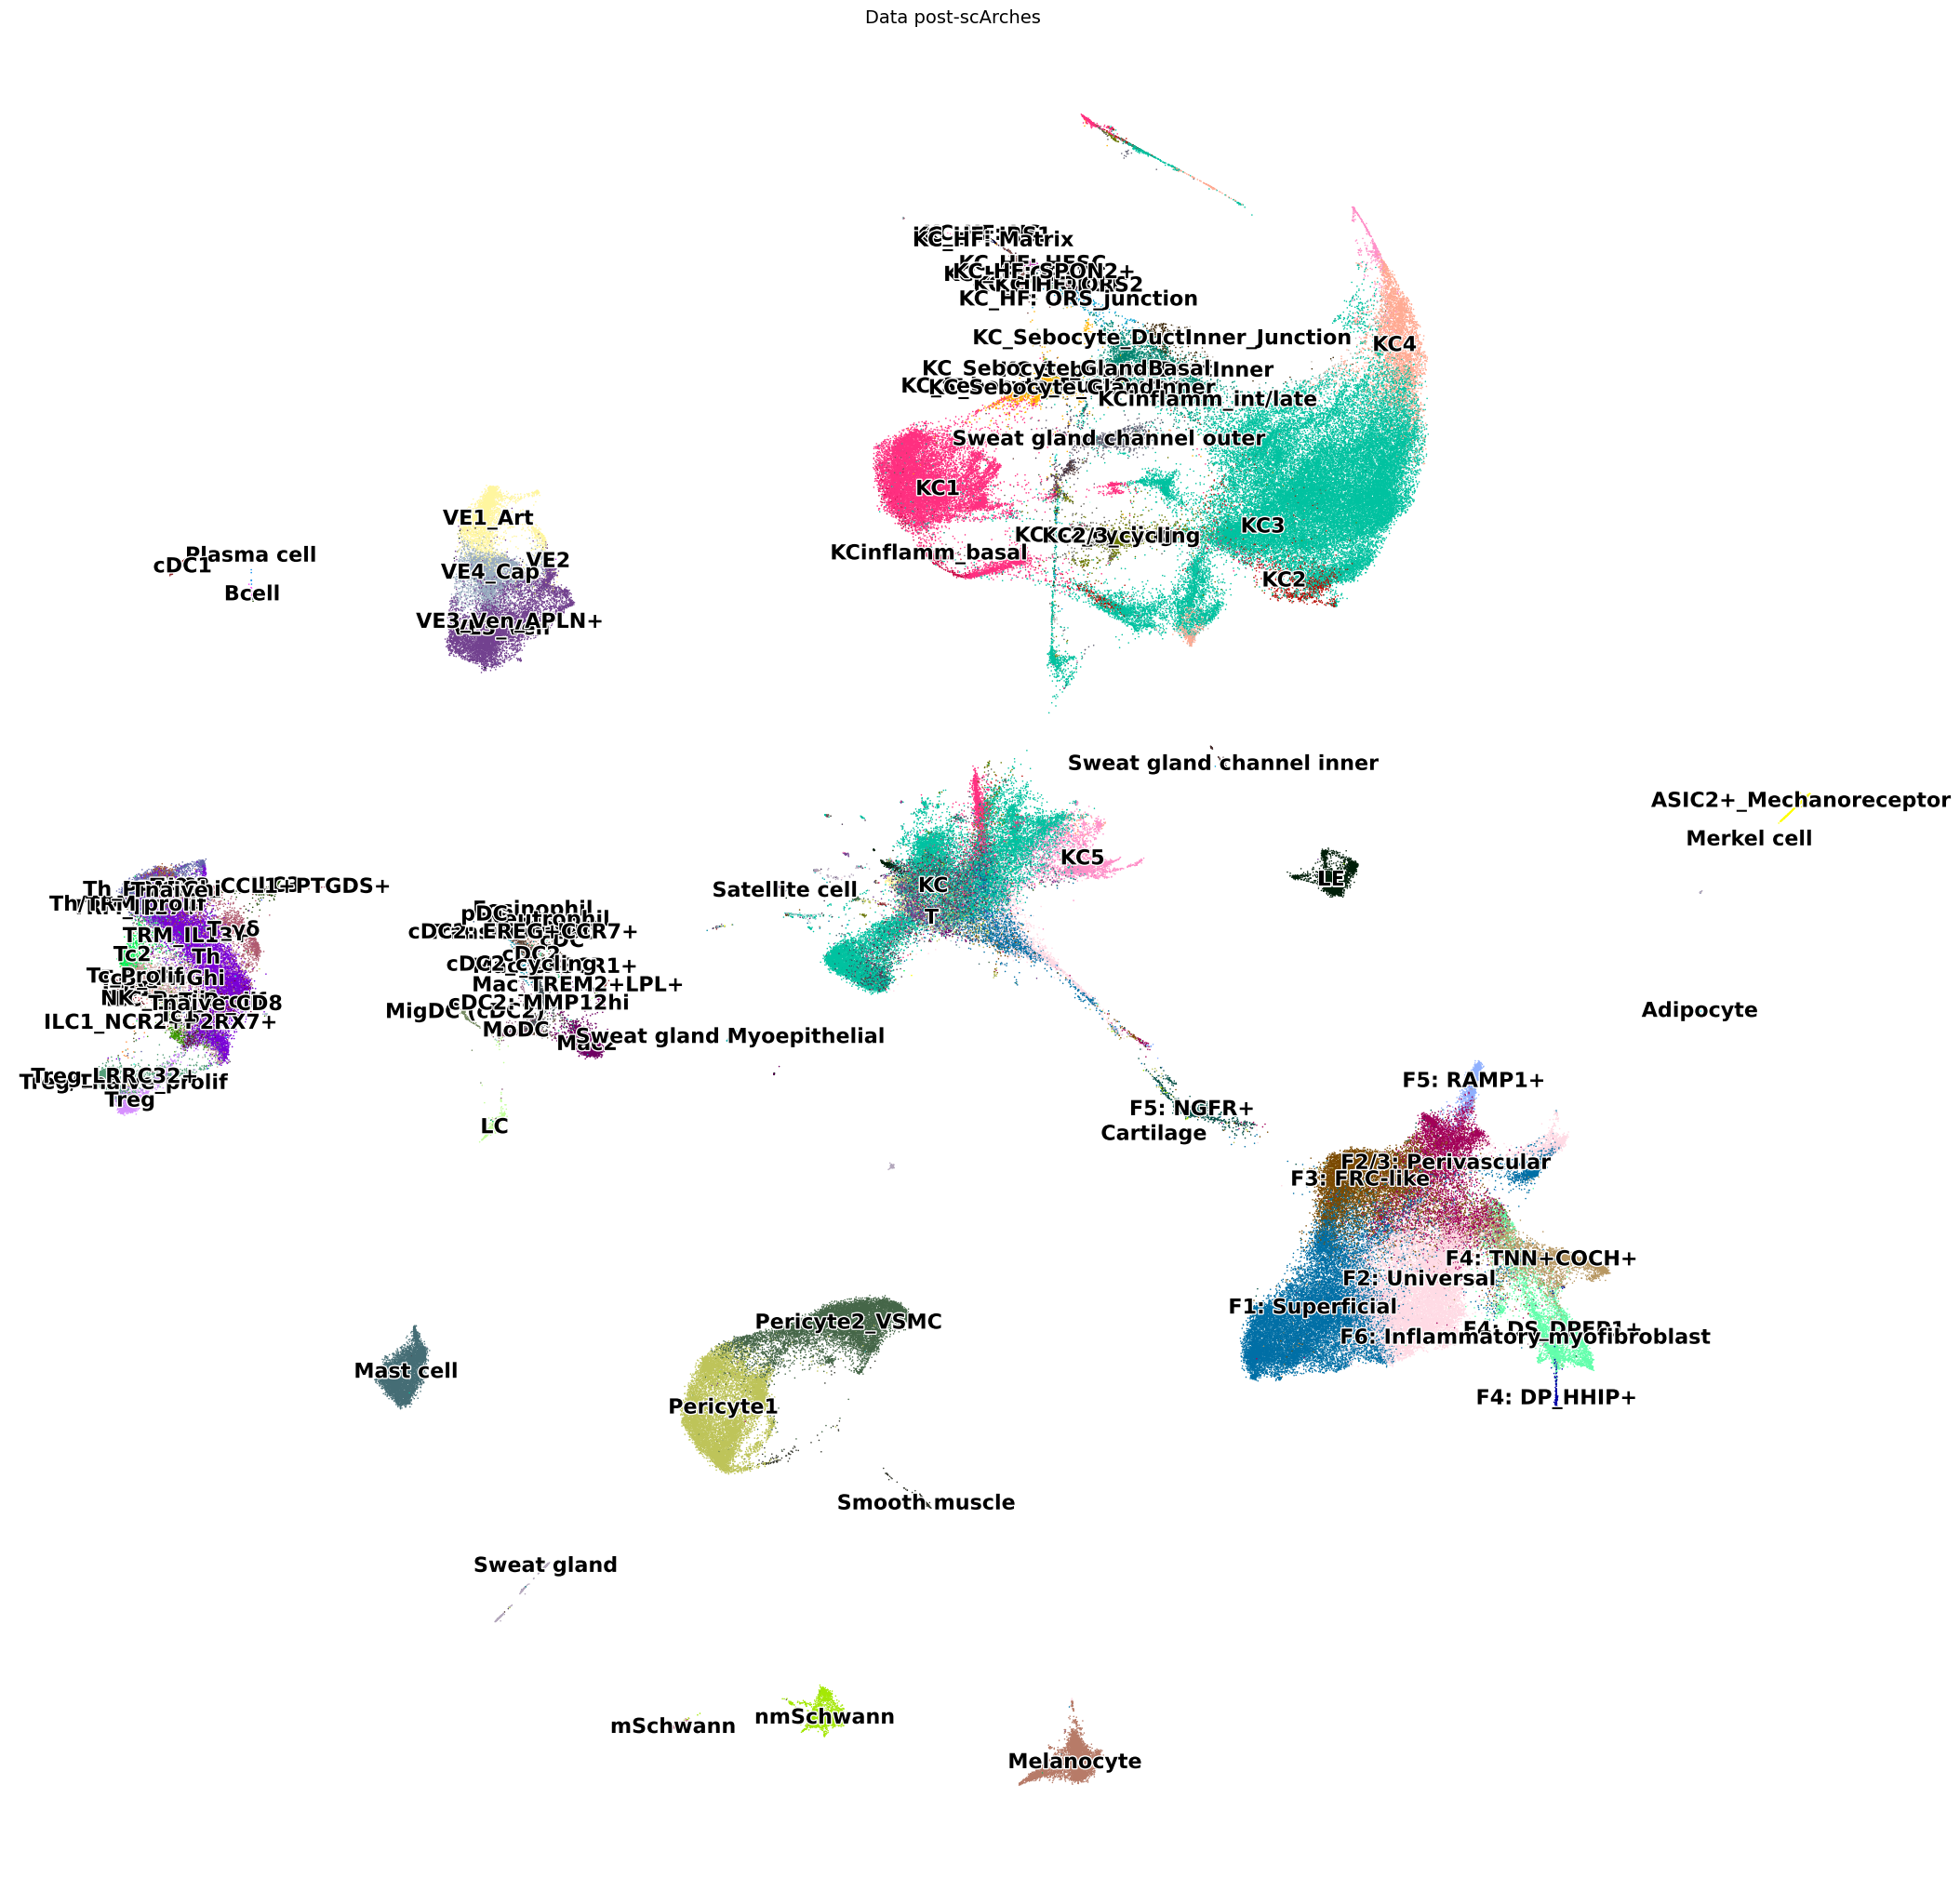

In [3]:
"""
not too bad at all (given it is very quick)!

Central population may represent a low quality population to exclude 
"""
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(26,26))

sc.pl.umap(
    target_adata,
    color=[
        'resourcehi_predictions',  
    ],
    legend_loc="on data",
    s=5, 
    legend_fontoutline=2,
    legend_fontsize=16,
    title="Data post-scArches"
)